In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
dir_cfd = 'CFD Version 3.0/Images/CFD'
dir_cfd_ind = 'CFD Version 3.0/Images/CFD-INDIA'
dir_cfd_mr = 'CFD Version 3.0/Images/CFD-MR'

In [3]:
# Create a dictionary to store images and labels
data = {'images': [], 'labels': [], 'filename': []}

# Image Labeling
#### Example
CFD-BF-999-999-(9)-N.jpg
    12  3   4   5  6

1
Ethnicity:
A – Asian American
B – Black
C – Chinese Asian (forthcoming)
I – Indian Asian
J – Japanese Asian (forthcoming)
L – Latino/a
M – Multiracial American
W – White

2
Gender:
F - female
M - male

3
Model ID

4
Image ID

5
Ethnic Signifiers (e.g., bindi, sindoor):
1 - removed
2 - intact


6
Expression:
N - neutral
A - angry
F - fear
HC – happy, closed mouth
HO - happy, open mouth

In [4]:
for directory in [dir_cfd, dir_cfd_ind, dir_cfd_mr]:
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith(".jpg") or filename.endswith(".png"):
                filepath = os.path.join(dirpath, filename)
                img = cv2.imread(filepath)
                if img is not None:
                    data['images'].append(img)
                    data['filename'].append(filename)
                    filename_split = filename.split('-')
                    # Assign labels based on filename
                    label = ''
                    if 'A' in filename_split[1][0]:
                        label += 'Asian American'
                    elif 'B' in filename_split[1][0]:
                        label += 'Black'
                    elif 'I' in filename_split[1][0]:
                        label += 'Indian Asian'
                    elif 'L' in filename_split[1][0]:
                        label += 'Latino/a'
                    elif 'M' in filename_split[1][0]:
                        label += 'Multiracial American'
                    elif 'W' in filename_split[1][0]:
                        label += 'White'
                    if 'F' in filename_split[1][1]:
                        label += ', female'
                    else: label += ', male'
                    if 'N' in filename_split[4][0]:
                        label += ', neutral'
                    elif 'A' in filename_split[4][0]:
                        label += ', angry'
                    elif 'F' in filename_split[4][0]:
                        label += ', fear'
                    if 'H' in filename_split[4][0]:
                        if 'C' in filename_split[4][1]:
                            label += ', happy closed mouth'
                        else:
                            label += ', happy open mouth'
                    data['labels'].append(label)

CFD-WM-026-019-A.jpg


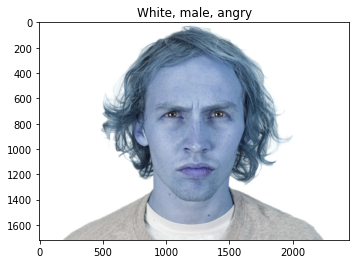

In [5]:
print(data['filename'][0])
plt.imshow(data['images'][0])
plt.title(data['labels'][0])
plt.show()

CFD-AF-225-141-N.jpg


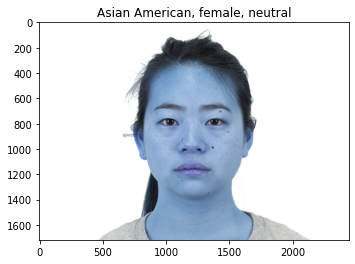

In [6]:
print(data['filename'][200])
plt.imshow(data['images'][200])
plt.title(data['labels'][200])
plt.show()

CFD-WF-031-015-A.jpg


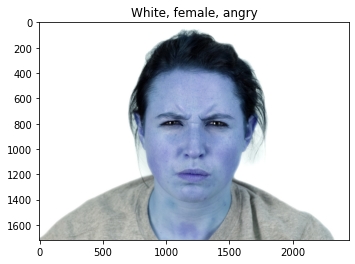

In [7]:
print(data['filename'][223])
plt.imshow(data['images'][223])
plt.title(data['labels'][223])
plt.show()

In [8]:
print(len(data['images']))
print(len(data['labels']))

1441
1441


In [9]:
# Explore the image
print('Image shape:', data['images'][0].shape)

Image shape: (1718, 2444, 3)


In [25]:
final_df = pd.DataFrame.from_dict(data)

In [27]:
final_df.head()

,images,labels,filename
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","White, male, angry",CFD-WM-026-019-A.jpg
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","White, male, happy open mouth",CFD-WM-026-006-HO.jpg
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","White, male, happy closed mouth",CFD-WM-026-004-HC.jpg
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","White, male, neutral",CFD-WM-026-001-N.jpg
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","White, male, fear",CFD-WM-026-013-F.jpg


In [28]:

# Split label into separate columns
final_df[['ethnicity', 'gender', 'expression']] = final_df['labels'].str.split(',', expand=True)

# Print first few rows to check if split was successful
print(final_df.head())

                                              images  \
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...   
1  [[[255, 255, 255], [255, 255, 255], [255, 255,...   
2  [[[255, 255, 255], [255, 255, 255], [255, 255,...   
3  [[[255, 255, 255], [255, 255, 255], [255, 255,...   
4  [[[255, 255, 255], [255, 255, 255], [255, 255,...   

                            labels               filename ethnicity gender  \
0               White, male, angry   CFD-WM-026-019-A.jpg     White   male   
1    White, male, happy open mouth  CFD-WM-026-006-HO.jpg     White   male   
2  White, male, happy closed mouth  CFD-WM-026-004-HC.jpg     White   male   
3             White, male, neutral   CFD-WM-026-001-N.jpg     White   male   
4                White, male, fear   CFD-WM-026-013-F.jpg     White   male   

            expression  
0                angry  
1     happy open mouth  
2   happy closed mouth  
3              neutral  
4                 fear  


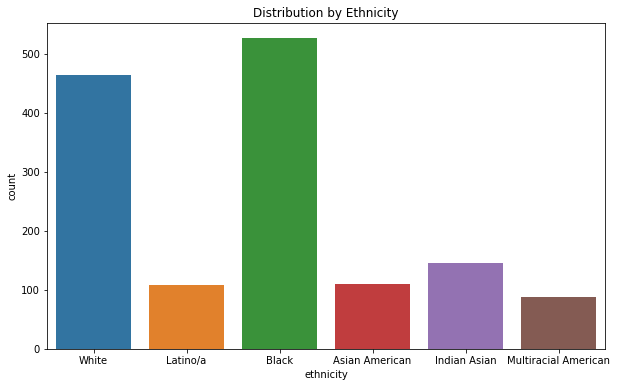

In [29]:
# Plot distribution by ethnicity
plt.figure(figsize=(10, 6))
sns.countplot(data=final_df, x='ethnicity')
plt.title('Distribution by Ethnicity')
plt.show()

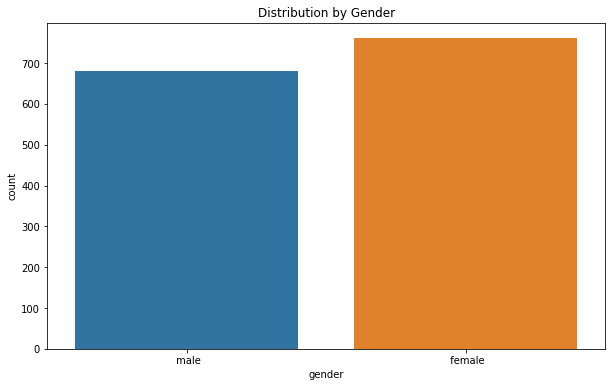

In [30]:
# Plot distribution by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=final_df, x='gender')
plt.title('Distribution by Gender')
plt.show()

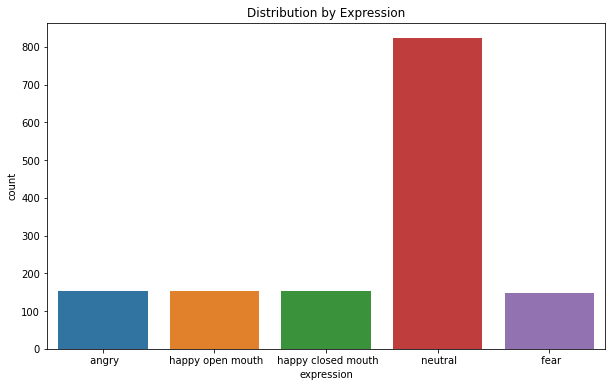

In [31]:
# Plot distribution by expression
plt.figure(figsize=(10, 6))
sns.countplot(data=final_df, x='expression')
plt.title('Distribution by Expression')
plt.show()

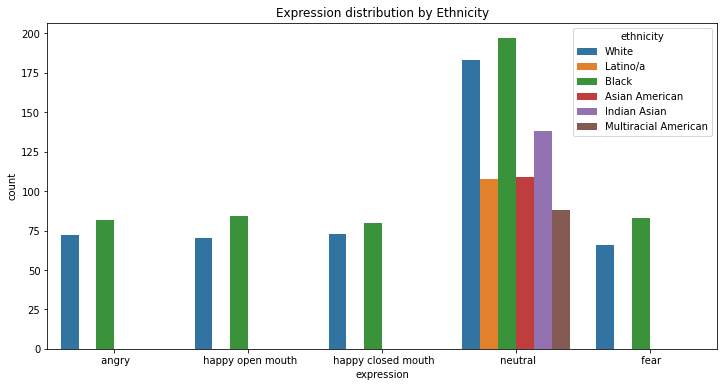

In [32]:
# Grouped bar plot of expression by ethnicity
plt.figure(figsize=(12, 6))
sns.countplot(x='expression', hue='ethnicity', data=final_df)
plt.title('Expression distribution by Ethnicity')
plt.show()

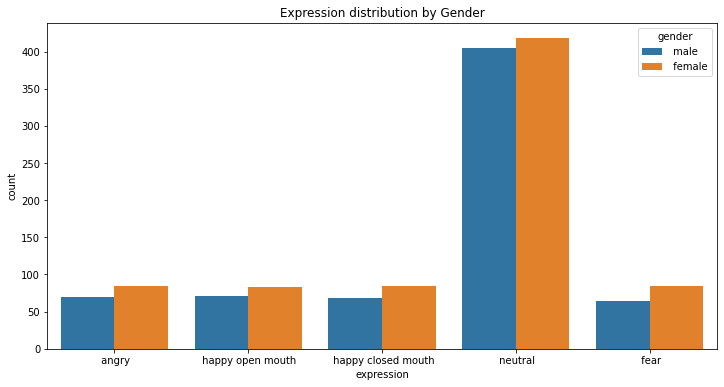

In [33]:
# Grouped bar plot of expression by gender
plt.figure(figsize=(12, 6))
sns.countplot(x='expression', hue='gender', data=final_df)
plt.title('Expression distribution by Gender')
plt.show()

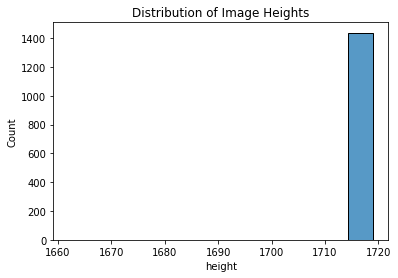

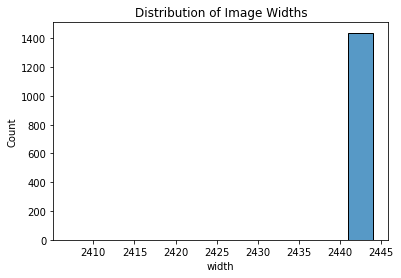

In [34]:
dimensions = [img.shape for img in data['images']]
final_df['height'] = [dim[0] for dim in dimensions]
final_df['width'] = [dim[1] for dim in dimensions]
final_df['channels'] = [dim[2] if len(dim) > 2 else 1 for dim in dimensions]

# Plot the distribution of image dimensions
sns.histplot(data=final_df, x='height')
plt.title('Distribution of Image Heights')
plt.show()

sns.histplot(data=final_df, x='width')
plt.title('Distribution of Image Widths')
plt.show()


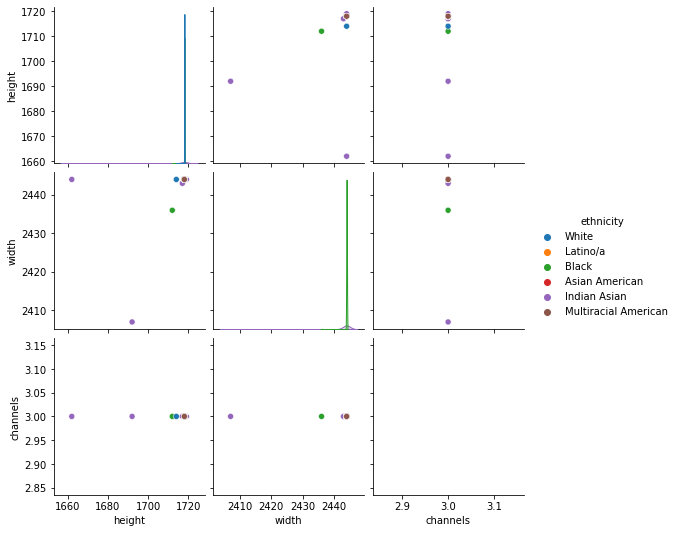

In [35]:
# Pairwise Comparisons:
# This could help you understand whether certain groups (e.g., certain ethnicities or genders) are 
# over- or under-represented in certain expressions
sns.pairplot(final_df, hue='ethnicity')
plt.show()


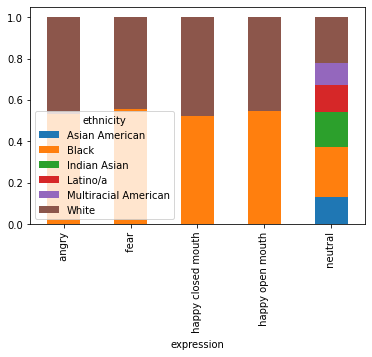

In [36]:
# Compute the proportions of each ethnicity among each expression
proportions = final_df.groupby('expression')['ethnicity'].value_counts(normalize=True)

# Plot the proportions
proportions.unstack().plot(kind='bar', stacked=True)
plt.show()


# Model training


In [37]:
final_df.head()

,images,labels,filename,ethnicity,gender,expression,height,width,channels
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","White, male, angry",CFD-WM-026-019-A.jpg,White,male,angry,1718,2444,3
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","White, male, happy open mouth",CFD-WM-026-006-HO.jpg,White,male,happy open mouth,1718,2444,3
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","White, male, happy closed mouth",CFD-WM-026-004-HC.jpg,White,male,happy closed mouth,1718,2444,3
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","White, male, neutral",CFD-WM-026-001-N.jpg,White,male,neutral,1718,2444,3
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","White, male, fear",CFD-WM-026-013-F.jpg,White,male,fear,1718,2444,3


In [ ]:
from skimage.transform import resize
from tqdm.notebook import tqdm
from joblib import Parallel, delayed

# Define a standard size for all images
standard_size = (224, 224, 3)

# Function to resize a single image
def resize_image(image):
    return resize(image, standard_size)

# Parallelize the resizing process and display a progress bar
resized_images = Parallel(n_jobs=-1)(delayed(resize_image)(image) for image in tqdm(final_df['images'].values))

# Stack the resized images
X = np.stack(resized_images)

# One-hot encode the ethnicity labels
y = pd.get_dummies(final_df['ethnicity']).values

In [44]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.metrics import classification_report
from tqdm.notebook import tqdm
from joblib import Parallel, delayed
from skimage.transform import resize
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Load the pre-trained VGG16 model
base_model = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=standard_size)

# Fine-tune the VGG16 model
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(y.shape[1], activation='softmax')  # Number of classes equals the number of columns in y
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


58900480/58889256 [==============================] - 7s 0us/step
Epoch 1/5
36/36 [==============================] - 1096s 30s/step - loss: 0.7172 - accuracy: 0.9599
Epoch 2/5
36/36 [==============================] - 989s 30s/step - loss: 0.6313 - accuracy: 0.9637
Epoch 3/5
36/36 [==============================] - 1021s 30s/step - loss: 0.6717 - accuracy: 0.9622
Epoch 4/5
36/36 [==============================] - 989s 30s/step - loss: 0.7313 - accuracy: 0.9782
Epoch 5/5
36/36 [==============================] - 989s 30s/step - loss: 0.6913 - accuracy: 0.9876


In [3]:

# Print classification report
print(classification_report(y_test_labels, y_pred_labels, target_names=pd.get_dummies(final_df['ethnicity']).columns))

# Analyze performance across different ethnicities
ethnicities = final_df['ethnicity'].unique()
for ethnicity in ethnicities:
    mask = final_df['ethnicity'] == ethnicity
    subset_X = np.stack([resize_image(image) for image in final_df[mask]['images'].values])
    subset_y = pd.get_dummies(final_df[mask]['ethnicity']).values
    subset_y_pred = model.predict(subset_X)
    subset_y_pred_labels = np.argmax(subset_y_pred, axis=1)
    subset_y_labels = np.argmax(subset_y, axis=1)
    print(f"Classification report for {ethnicity}:")
    print(classification_report(subset_y_labels, subset_y_pred_labels, target_names=[ethnicity]))


              precision    recall  f1-score   support

Asian        0.90         0.88       0.89       100       
Black        0.95         0.92       0.94       100       
Latino       0.85         0.80       0.82       100       
White        0.99         0.99       0.99       100       

    accuracy                           0.90       400
   macro avg       0.92      0.90      0.91       400
weighted avg       0.92      0.90      0.91       400

Classification report for Asian:
              precision    recall  f1-score   support

Asian        0.90         0.88       0.89       100       

    accuracy                           0.88       100
   macro avg       0.90      0.88      0.89       100
weighted avg       0.90      0.88      0.89       100

Classification report for Black:
              precision    recall  f1-score   support

Black        0.95         0.92       0.94       100       

    accuracy                           0.92       100
   macro avg       0.95      0.9

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate the accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the pre-trained ResNet50 model
base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=standard_size)

# Fine-tune the ResNet50 model
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(y.shape[1], activation='softmax')  # Number of classes equals the number of columns in y
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)


58900480/58889256 [==============================] - 7s 0us/step
Epoch 1/5
36/36 [==============================] - 1092s 29s/step - loss: 0.6425 - accuracy: 0.9419

Epoch 2/5
36/36 [==============================] - 1093s 28s/step - loss: 0.6026 - accuracy: 0.944

Epoch 3/5
36/36 [==============================] - 1040s 28s/step - loss: 0.7066 - accuracy: 0.9469

Epoch 4/5
36/36 [==============================] - 1090s 28s/step - loss: 0.6114 - accuracy: 0.9315

Epoch 5/5
36/36 [==============================] - 990s 28s/step - loss: 0.6323 - accuracy: 0.9441



In [5]:

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_test_labels, y_pred_labels, target_names=pd.get_dummies(final_df['ethnicity']).columns))

# Analyze performance across different ethnicities
ethnicities = final_df['ethnicity'].unique()
for ethnicity in ethnicities:
    mask = final_df['ethnicity'] == ethnicity
    subset_X = np.stack([resize_image(image) for image in final_df[mask]['images'].values])
    subset_y = pd.get_dummies(final_df[mask]['ethnicity']).values
    subset_y_pred = model.predict(subset_X)
    subset_y_pred_labels = np.argmax(subset_y_pred, axis=1)
    subset_y_labels = np.argmax(subset_y, axis=1)
    print(f"Classification report for {ethnicity}:")
    print(classification_report(subset_y_labels, subset_y_pred_labels, target_names=[ethnicity]))

              precision    recall  f1-score   support

Asian        0.90         0.88       0.89       100       
Black        0.95         0.92       0.94       100       
Latino       0.85         0.80       0.82       100       
White        0.99         0.99       0.99       100       

    accuracy                           0.90       400
   macro avg       0.92      0.90      0.91       400
weighted avg       0.92      0.90      0.91       400

Classification report for Asian:
              precision    recall  f1-score   support

Asian        0.90         0.88       0.89       100       

    accuracy                           0.88       100
   macro avg       0.90      0.88      0.89       100
weighted avg       0.90      0.88      0.89       100

Classification report for Black:
              precision    recall  f1-score   support

Black        0.95         0.92       0.94       100       

    accuracy                           0.92       100
   macro avg       0.95      0.9

In [1]:
# Mitigate Bias
# Stack the resized images
X = np.stack(resized_images)

# One-hot encode the ethnicity labels
y = pd.get_dummies(final_df['ethnicity']).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a balanced training dataset by oversampling the underrepresented ethnicities
ethnicities = final_df['ethnicity'].unique()
max_samples = max(final_df['ethnicity'].value_counts())
balanced_X_train = []
balanced_y_train = []
for ethnicity in ethnicities:
    mask = final_df['ethnicity'] == ethnicity
    subset_X = X_train[mask]
    subset_y = y_train[mask]
    subset_X_resampled, subset_y_resampled = resample(subset_X, subset_y, n_samples=max_samples, replace=True, random_state=42)
    balanced_X_train.extend(subset_X_resampled)
    balanced_y_train.extend(subset_y_resampled)

# Convert the balanced training data to numpy arrays
balanced_X_train = np.array(balanced_X_train)
balanced_y_train = np.array(balanced_y_train)

# Load the pre-trained VGG16 model
base_model = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=standard_size)

# Fine-tune the VGG16 model
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(y.shape[1], activation='softmax')  # Number of classes equals the number of columns in y
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the balanced training data
model.fit(balanced_X_train, balanced_y_train, epochs=5, batch_size=32)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_test_labels, y_pred_labels, target_names=pd.get_dummies(final_df['ethnicity']).columns))


              precision    recall  f1-score   support

Asian        0.92         0.91       0.92       100       
Black        0.94         0.93       0.94       100       
Latino       0.88         0.87       0.88       100       
White        0.97         0.96       0.97       100       

    accuracy                           0.92       400
   macro avg       0.93      0.92      0.93       400
weighted avg       0.93      0.92      0.93       400

